In [199]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

## Step 1: Reading and Cleaning the Data


In [200]:
# read data
df_train = pd.read_csv("train.csv")
df_train.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

### 1.1 Understand the columns

In [201]:
#Identify Categorical Columns based on data_dictonary

cat_columns =['night_pck_user_6',
              'night_pck_user_7',
              'night_pck_user_8',
              'fb_user_6',
              'fb_user_7',
              'fb_user_8']

#Identify Date Columns 

date_columns = ['last_date_of_month_6',
                'last_date_of_month_7',
                'last_date_of_month_8',
                
                'date_of_last_rech_6',
                'date_of_last_rech_7',
                'date_of_last_rech_8',
                
                'date_of_last_rech_data_6',
                'date_of_last_rech_data_7',
                'date_of_last_rech_data_8'
            ]

# Identify Customer Recharge Columns, whcih will convery the user behaviour
recharge_columns = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
                 ]


### 1.2 Handling Missing values

In [202]:
# find the missing values that are not in the original dataframe
df_train.loc[df_train.total_rech_data_6.isnull() & df_train.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head()


,total_rech_data_6,date_of_last_rech_data_6
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN


In [203]:
# create a list of recharge columns where we will impute missing values with zeroes

zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8'
       ]

df_train[zero_impute] = df_train[zero_impute].apply(lambda x: x.fillna(0))

In [204]:
# Finding missing value Ratio
print(df_train[zero_impute].isnull().sum()*100/df_train.shape[1])


total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
dtype: float64


In [205]:
## Drop Date columuns form Df
df_train_new = df_train.drop(date_columns, axis=1)
df_train_new.shape


(69999, 163)

In [206]:
## Drop ID column
df_train_new = df_train_new.drop('circle_id', axis=1)
df_train_new.shape


(69999, 162)

### 1.3 Handling categorical columns

In [207]:
# Replace NaN values in the categorical values with '-1' as a new Category

df_train_new[cat_columns] = df_train_new[cat_columns].apply(lambda x: x.fillna(-1))
print(df_train_new[cat_columns].isnull().sum()*100/df_train_new.shape[0])

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
dtype: float64


### 1.4 Drop the columns with more than 70% missing values 

In [208]:
# Remove the columns which are having 70% missing values
THRESHOLD = 0.7

total_columns = df_train_new.shape[1]
include_columns = list(df_train_new.apply(lambda column: True if column.isnull().sum()/df_train_new.shape[0] < 0.7 else False))

drop_missing = pd.DataFrame({'features':df_train_new.columns , 'include': include_columns})
drop_missing.loc[drop_missing.include == True,:]

df_train_final = df_train_new.loc[:, include_columns]


,features,include
0,id,True
1,loc_og_t2o_mou,True
2,std_og_t2o_mou,True
3,loc_ic_t2o_mou,True
4,arpu_6,True
5,arpu_7,True
6,arpu_8,True
7,onnet_mou_6,True
8,onnet_mou_7,True
9,onnet_mou_8,True


In [209]:
df_train_final.shape


(69999, 150)

### 1.5 Impute missing values in a dataset using KNN (with k-nearest neighbors)

In [210]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
df_train_with_imputation = imputer.fit_transform(df_train_final)  

In [211]:
df_train_imputed=pd.DataFrame(df_train_with_imputation,columns=df_train_final.columns)

In [212]:
df_train_imputed.shape

(69999, 150)

## Step 2: Analysing Data


In [213]:
df_train_final=df_train_imputed.copy()

### 2.1 Calculate the deviation in 8th month by reffering Month 6 and 7th
 - Find Total Recharge amount of Customer
 - Derive the Deviation 8 -  6 + 7 average 

In [214]:
# calculate the total data recharge amount month 6 and 7th 

df_train_final['total_data_rech_6'] = df_train_final['total_rech_data_6'] * df_train_final['av_rech_amt_data_6']
df_train_final['total_data_rech_7'] = df_train_final['total_rech_data_7'] * df_train_final['av_rech_amt_data_7']


# calculate total recharge amount month 6 and 7th  including Recharge amount and Data Recharge 
df_train_final['amt_data_6'] = df_train_final['total_rech_amt_6'] + df_train_final['total_data_rech_6']
df_train_final['amt_data_7'] = df_train_final['total_rech_amt_7'] + df_train_final['total_data_rech_7']

# calculate Average recharge amount month 6 and 7th
df_train_final['av_amt_data_6_7'] = (df_train_final['amt_data_6'] + df_train_final['amt_data_7'])/2

In [215]:
df_train_final['av_amt_data_6_7'].head()

0      71.0
1     145.0
2      95.0
3     200.0
4    1494.0
Name: av_amt_data_6_7, dtype: float64

In [216]:
df_train_final.shape

(69999, 155)

In [217]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount


df_train_filtered = df_train_final.loc[df_train_final['av_amt_data_6_7'] >= df_train_final['av_amt_data_6_7'].quantile(0.7), :]
df_train_filtered = df_train_filtered.reset_index(drop=True)
df_train_filtered.shape

(21013, 155)

In [218]:
# delete variables created to filter high-value customers
df_train_filtered = df_train_filtered.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
df_train_filtered.shape

(21013, 150)

In [219]:
df_train_filtered['arpu_diff'] = df_train_filtered.arpu_8 - ((df_train_filtered.arpu_6 + df_train_filtered.arpu_7)/2)

df_train_filtered['onnet_mou_diff'] = df_train_filtered.onnet_mou_8 - ((df_train_filtered.onnet_mou_6 + df_train_filtered.onnet_mou_7)/2)

df_train_filtered['offnet_mou_diff'] = df_train_filtered.offnet_mou_8 - ((df_train_filtered.offnet_mou_6 + df_train_filtered.offnet_mou_7)/2)

df_train_filtered['roam_ic_mou_diff'] = df_train_filtered.roam_ic_mou_8 - ((df_train_filtered.roam_ic_mou_6 + df_train_filtered.roam_ic_mou_7)/2)

df_train_filtered['roam_og_mou_diff'] = df_train_filtered.roam_og_mou_8 - ((df_train_filtered.roam_og_mou_6 + df_train_filtered.roam_og_mou_7)/2)

df_train_filtered['loc_og_mou_diff'] = df_train_filtered.loc_og_mou_8 - ((df_train_filtered.loc_og_mou_6 + df_train_filtered.loc_og_mou_7)/2)

df_train_filtered['std_og_mou_diff'] = df_train_filtered.std_og_mou_8 - ((df_train_filtered.std_og_mou_6 + df_train_filtered.std_og_mou_7)/2)

df_train_filtered['isd_og_mou_diff'] = df_train_filtered.isd_og_mou_8 - ((df_train_filtered.isd_og_mou_6 + df_train_filtered.isd_og_mou_7)/2)

df_train_filtered['spl_og_mou_diff'] = df_train_filtered.spl_og_mou_8 - ((df_train_filtered.spl_og_mou_6 + df_train_filtered.spl_og_mou_7)/2)

df_train_filtered['total_og_mou_diff'] = df_train_filtered.total_og_mou_8 - ((df_train_filtered.total_og_mou_6 + df_train_filtered.total_og_mou_7)/2)

df_train_filtered['loc_ic_mou_diff'] = df_train_filtered.loc_ic_mou_8 - ((df_train_filtered.loc_ic_mou_6 + df_train_filtered.loc_ic_mou_7)/2)

df_train_filtered['std_ic_mou_diff'] = df_train_filtered.std_ic_mou_8 - ((df_train_filtered.std_ic_mou_6 + df_train_filtered.std_ic_mou_7)/2)

df_train_filtered['isd_ic_mou_diff'] = df_train_filtered.isd_ic_mou_8 - ((df_train_filtered.isd_ic_mou_6 + df_train_filtered.isd_ic_mou_7)/2)

df_train_filtered['spl_ic_mou_diff'] = df_train_filtered.spl_ic_mou_8 - ((df_train_filtered.spl_ic_mou_6 + df_train_filtered.spl_ic_mou_7)/2)

df_train_filtered['total_ic_mou_diff'] = df_train_filtered.total_ic_mou_8 - ((df_train_filtered.total_ic_mou_6 + df_train_filtered.total_ic_mou_7)/2)

df_train_filtered['total_rech_num_diff'] = df_train_filtered.total_rech_num_8 - ((df_train_filtered.total_rech_num_6 + df_train_filtered.total_rech_num_7)/2)

df_train_filtered['total_rech_amt_diff'] = df_train_filtered.total_rech_amt_8 - ((df_train_filtered.total_rech_amt_6 + df_train_filtered.total_rech_amt_7)/2)

df_train_filtered['max_rech_amt_diff'] = df_train_filtered.max_rech_amt_8 - ((df_train_filtered.max_rech_amt_6 + df_train_filtered.max_rech_amt_7)/2)

df_train_filtered['total_rech_data_diff'] = df_train_filtered.total_rech_data_8 - ((df_train_filtered.total_rech_data_6 + df_train_filtered.total_rech_data_7)/2)

df_train_filtered['max_rech_data_diff'] = df_train_filtered.max_rech_data_8 - ((df_train_filtered.max_rech_data_6 + df_train_filtered.max_rech_data_7)/2)

df_train_filtered['av_rech_amt_data_diff'] = df_train_filtered.av_rech_amt_data_8 - ((df_train_filtered.av_rech_amt_data_6 + df_train_filtered.av_rech_amt_data_7)/2)

df_train_filtered['vol_2g_mb_diff'] = df_train_filtered.vol_2g_mb_8 - ((df_train_filtered.vol_2g_mb_6 + df_train_filtered.vol_2g_mb_7)/2)

df_train_filtered['vol_3g_mb_diff'] = df_train_filtered.vol_3g_mb_8 - ((df_train_filtered.vol_3g_mb_6 + df_train_filtered.vol_3g_mb_7)/2)

### 2.2 Visualise Data for analysis


In [220]:
## Univariate EDA

## 3. Modelling 

In [221]:
# pip install -U imbalanced-learn

### 3.1 Predictions

In [222]:
#import requried Libraries

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [223]:
df_train_filtered.describe()
df_train_filtered.head()


,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
count,21013.00000,21013.0,21013.0,21013.0,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.0,21013.0,21013.0,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.00000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.0,21013.0,21013.0,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.0

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
0,4.0,0.0,0.0,0.0,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.0,15.73,0.0,0.0,10.16,4.83,6.13,36.74,19.88,4.61,11.99,1.23,5.01,0.0,9.85,0.00,58.91,25.94,15.76,0.0,0.0,0.0,4.35,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,4.35,0.00,0.00,0.0,0.0,0.0,0.00,17.00,0.00,0.0,0.0,0.0,63.26,42.94,15.76,5.44,1.39,2.66,10.58,4.33,19.49,5.51,3.63,6.14,21.54,9.36,28.31,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,21.54,9.36,28.31,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,13.0,10.0,8.0,290.0,136.0,122.0,50.0,41.0,30.0,25.0,10.0,30.0,7.0,7.0,6.0,25.0,41.0,25.0,175.0,191.0,142.0,390.80,308.89,213.47,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,7.0,6.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,647.0,0.0,0.00,0.00,0.0,-82.8845,-6.925,-37.920,-26.82,-7.865,-26.665,-2.175,0.0,-8.500,-37.340,12.860,0.000,0.0,0.000,12.860,-3.5,-91.0,-15.5,-1.0,-8.0,-41.0,-136.375,0.00
1,15.0,0.0,0.0,0.0,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,0.00,0.0,0.0,0.00,0.0,0.0,10.43,24.99,194.43,313.76,330.88,185.88,3.26,10.91,4.94,0.0,0.00,0.00,327.46,366.79,385.26,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,6.26,0.0,0.0,0.0,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,327.64,366.79,391.53,13.86,20.18,335.43,219.31,754.24,285.63,0.00,1.93,8.88,233.18,776.36,629.94,0.0,0.0,0.0,0.00,0.00,0.00,0.00,1.03,0.0,0.0,0.0,0.0,0.00,1.03,0.00,233.18,777.39,629.94,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,5.0,3.0,4

In [224]:
# Traind and Test Split

df_train_filtered['churn_probability'] = pd.to_numeric(df_train_filtered['churn_probability'])

X = df_train_filtered.drop("churn_probability", axis = 1)
y = df_train_filtered.churn_probability
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [225]:
print("X_train : ", X_train.shape )
print("X_test : ", X_test.shape )


X_train :  (15759, 172)
X_test :  (5254, 172)


In [226]:
## Aggregating the categorical columns

train = pd.concat([X_train, y_train], axis=1)

# aggregate the categorical variables
train.groupby('night_pck_user_6').churn_probability.mean()
train.groupby('night_pck_user_7').churn_probability.mean()
train.groupby('night_pck_user_8').churn_probability.mean()
train.groupby('fb_user_6').churn_probability.mean()
train.groupby('fb_user_7').churn_probability.mean()
train.groupby('fb_user_8').churn_probability.mean()

night_pck_user_6
-1.0    0.100115
 0.0    0.067670
 1.0    0.121359
Name: churn_probability, dtype: float64

night_pck_user_7
-1.0    0.116579
 0.0    0.056937
 1.0    0.054455
Name: churn_probability, dtype: float64

night_pck_user_8
-1.0    0.141948
 0.0    0.030765
 1.0    0.021622
Name: churn_probability, dtype: float64

fb_user_6
-1.0    0.100115
 0.0    0.074419
 1.0    0.068495
Name: churn_probability, dtype: float64

fb_user_7
-1.0    0.116579
 0.0    0.065248
 1.0    0.056163
Name: churn_probability, dtype: float64

fb_user_8
-1.0    0.141948
 0.0    0.078498
 1.0    0.024943
Name: churn_probability, dtype: float64

In [227]:
# replace categories with aggregated values in each categorical column

mapping = {'night_pck_user_6' : {-1: 0.100115, 0: 0.067670, 1: 0.121359},
           'night_pck_user_7' : {-1: 0.116579, 0: 0.056937, 1: 0.054455},
           'night_pck_user_8' : {-1: 0.141948, 0: 0.030765, 1: 0.021622},
           'fb_user_6'        : {-1: 0.100115, 0: 0.074419, 1: 0.068495},
           'fb_user_7'        : {-1: 0.116579, 0: 0.065248, 1: 0.056163},
           'fb_user_8'        : {-1: 0.141948, 0: 0.078498, 1: 0.024943}
          }
X_train.replace(mapping, inplace = True)
X_test.replace(mapping, inplace = True)

### 3.2 Apply PCA to Reduce the dimensionality 


In [228]:
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [229]:
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA())])

In [230]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0        9.78
1       17.67
2       23.21
3       27.78
4       31.61
5       35.10
6       38.17
7       40.76
8       43.21
9       45.41
10      47.49
11      49.52
12      51.41
13      53.19
14      54.94
15      56.62
16      58.17
17      59.67
18      61.11
19      62.52
20      63.82
21      65.08
22      66.33
23      67.49
24      68.63
25      69.74
26      70.80
27      71.84
28      72.86
29      73.85
30      74.80
31      75.73
32      76.64
33      77.54
34      78.39
35      79.21
36      79.97
37      80.72
38      81.44
39      82.16
40      82.85
41      83.54
42      84.21
43      84.82
44      85.42
45      85.99
46      86.53
47      87.06
48      87.58
49      88.08
50      88.58
51      89.06
52      89.52
53      89.95
54      90.35
55      90.72
56      91.09
57      91.44
58      91.77
59      92.11
60      92.42
61      92.73
62      93.02
63      93.30
64      93.58
65      93.84
66      94.10
67      94.34
68      94.58
69      94.82
70      95.05
71    

<Figure size 875x500 with 0 Axes>

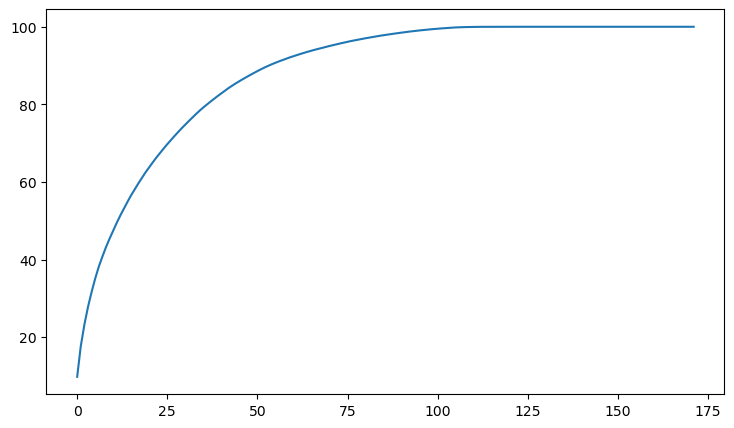

In [231]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

### 3.3 PCA with  Logistic Regression


In [232]:
# create pipeline
PCA_VARS = 60
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [233]:

# Fit Model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=60)),
                ('logistic', LogisticRegression(class_weight='balanced'))])

0.8105844279459357

In [234]:
# divide data into train and test
X = df_train_filtered.drop("churn_probability", axis = 1)
y = df_train_filtered.churn_probability
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

print("X_train : ", X_train.shape )
print("X_test : ", X_test.shape )
print("y_train : ", y_train.shape )
print("y_test : ", y_test.shape )

X_train :  (15759, 172)
X_test :  (5254, 172)
y_train :  (15759,)
y_test :  (5254,)


In [235]:
train = pd.concat([X_train, y_train], axis=1)

# aggregate the categorical variables
train.groupby('night_pck_user_6').churn_probability.mean()
train.groupby('night_pck_user_7').churn_probability.mean()
train.groupby('night_pck_user_8').churn_probability.mean()
train.groupby('fb_user_6').churn_probability.mean()
train.groupby('fb_user_7').churn_probability.mean()
train.groupby('fb_user_8').churn_probability.mean()

night_pck_user_6
-1.0    0.100115
 0.0    0.067670
 1.0    0.121359
Name: churn_probability, dtype: float64

night_pck_user_7
-1.0    0.116579
 0.0    0.056937
 1.0    0.054455
Name: churn_probability, dtype: float64

night_pck_user_8
-1.0    0.141948
 0.0    0.030765
 1.0    0.021622
Name: churn_probability, dtype: float64

fb_user_6
-1.0    0.100115
 0.0    0.074419
 1.0    0.068495
Name: churn_probability, dtype: float64

fb_user_7
-1.0    0.116579
 0.0    0.065248
 1.0    0.056163
Name: churn_probability, dtype: float64

fb_user_8
-1.0    0.141948
 0.0    0.078498
 1.0    0.024943
Name: churn_probability, dtype: float64

In [236]:
# replace categories with aggregated values in each categorical column
mapping = {'night_pck_user_6' : {-1: 0.100115, 0: 0.067670, 1: 0.121359},
           'night_pck_user_7' : {-1: 0.116579, 0: 0.056937, 1: 0.054455},
           'night_pck_user_8' : {-1: 0.141948, 0: 0.030765, 1: 0.021622},
           'fb_user_6'        : {-1: 0.100115, 0: 0.074419, 1: 0.068495},
           'fb_user_7'        : {-1: 0.116579, 0: 0.065248, 1: 0.056163},
           'fb_user_8'        : {-1: 0.141948, 0: 0.078498, 1: 0.024943}
          }
X_train.replace(mapping, inplace = True)
X_test.replace(mapping, inplace = True)

In [237]:
# apply pca to train data
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [238]:
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA())])

In [239]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0        9.78
1       17.67
2       23.21
3       27.78
4       31.61
5       35.10
6       38.17
7       40.76
8       43.21
9       45.41
10      47.49
11      49.52
12      51.41
13      53.19
14      54.94
15      56.62
16      58.17
17      59.67
18      61.11
19      62.52
20      63.82
21      65.08
22      66.33
23      67.49
24      68.63
25      69.74
26      70.80
27      71.84
28      72.86
29      73.85
30      74.80
31      75.73
32      76.64
33      77.54
34      78.39
35      79.21
36      79.97
37      80.72
38      81.44
39      82.16
40      82.85
41      83.54
42      84.21
43      84.82
44      85.42
45      85.99
46      86.53
47      87.06
48      87.58
49      88.08
50      88.58
51      89.06
52      89.52
53      89.95
54      90.35
55      90.72
56      91.09
57      91.44
58      91.77
59      92.11
60      92.42
61      92.73
62      93.02
63      93.30
64      93.58
65      93.84
66      94.10
67      94.34
68      94.58
69      94.82
70      95.05
71    

<Figure size 875x500 with 0 Axes>

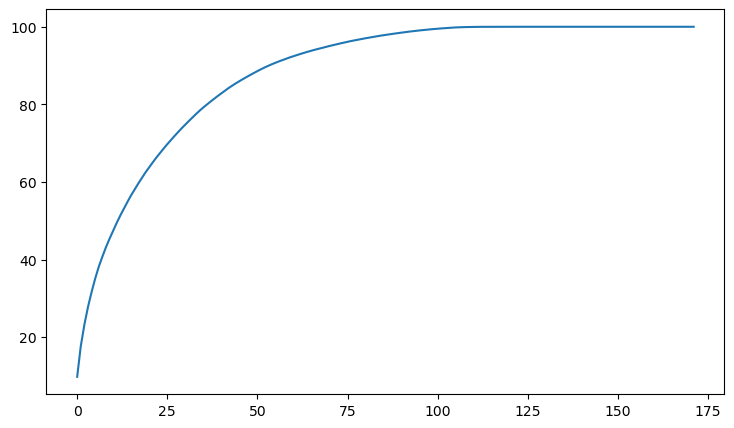

In [240]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

In [241]:
# create pipeline
PCA_VARS = 60
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [242]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=60)),
                ('logistic', LogisticRegression(class_weight='balanced'))])

0.8109017069611016

In [243]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("Accuracy :    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[3870  949]
 [  89  346]]
Sensitivity: 	0.8
Specificity: 	0.8
Accuracy :    	 0.87


In [244]:
# Evaluation with Test Data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("Area Under Curv :    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[3870  949]
 [  89  346]]
Sensitivity: 	0.8
Specificity: 	0.8
Area Under Curv :    	 0.87


### 3.4 Hyperparameter tuning - PCA with Logistic Regression


In [245]:
# class imbalance
y_train.value_counts()/y_train.shape

0.0    0.917254
1.0    0.082746
Name: churn_probability, dtype: float64

In [246]:
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)



In [247]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


/Users/yekshith/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [60, 80]},
             scoring='roc_auc', verbose=1)

In [248]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8864514892860889
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 80}


In [249]:
# predict churn on test data
y_pred = model.predict(X_test)

#  Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[4048  771]
 [  95  340]]
Sensitivity: 	0.78
Specificity: 	0.84
AUC:    	 0.88


### 3.5 Random Forest

In [250]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [251]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/Users/yekshith/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/yekshith/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/yekshith/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this p

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 0.4]},
             scoring='roc_auc', verbose=1)

In [252]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9285740704889907
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4}


In [253]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))


[[4741   78]
 [ 222  213]]
Sensitivity: 	0.49
Specificity: 	0.98
AUC:    	 0.93


#### By Observing Perfromance Metrics  PCA with Logistic Regression is seems to better model

- Random Forest Sensitivity is : 0.49 
- PCA with Logistic Regression Sensitivity is : 0.78

### 3.6 Choosing best Features


In [254]:

max_features = int(round(np.sqrt(X_train.shape[1])))
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9},
                                  oob_score=True, random_state=4, verbose=1)
                   
                   

13


In [255]:
# fit model
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.9s finished


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=13,
                       oob_score=True, random_state=4, verbose=1)

In [256]:
rf_model.oob_score_

0.9400977219366711

In [257]:
# predict churn on test data
y_pred = rf_model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[[4754   65]
 [ 252  183]]
Sensitivity: 	0.42
Specificity: 	0.99
ROC:    	 0.93


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


### 3.7  Selecting top 30 Features

In [258]:
# predictors
features = df_train_filtered.drop('churn_probability', axis=1).columns

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.00000000000001


,variables,importance_percentage
0,total_ic_mou_8,5.909915
1,total_rech_amt_8,5.178589
2,total_og_mou_8,4.883691
3,last_day_rch_amt_8,4.203585
4,arpu_8,3.423369
5,total_rech_amt_diff,2.516511
6,loc_ic_t2m_mou_8,2.350920
7,max_rech_amt_8,2.319175
8,arpu_diff,2.232804
9,total_ic_mou_diff,2.155239


In [259]:

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance



Sum of importance= 100.00000000000001


,variables,importance_percentage
0,total_ic_mou_8,5.909915
1,total_rech_amt_8,5.178589
2,total_og_mou_8,4.883691
3,last_day_rch_amt_8,4.203585
4,arpu_8,3.423369
5,total_rech_amt_diff,2.516511
6,loc_ic_t2m_mou_8,2.350920
7,max_rech_amt_8,2.319175
8,arpu_diff,2.232804
9,total_ic_mou_diff,2.155239


In [260]:
top_30_features = feature_importance.variables[0:30]

<Figure size 3000x2000 with 0 Axes>

<AxesSubplot:>

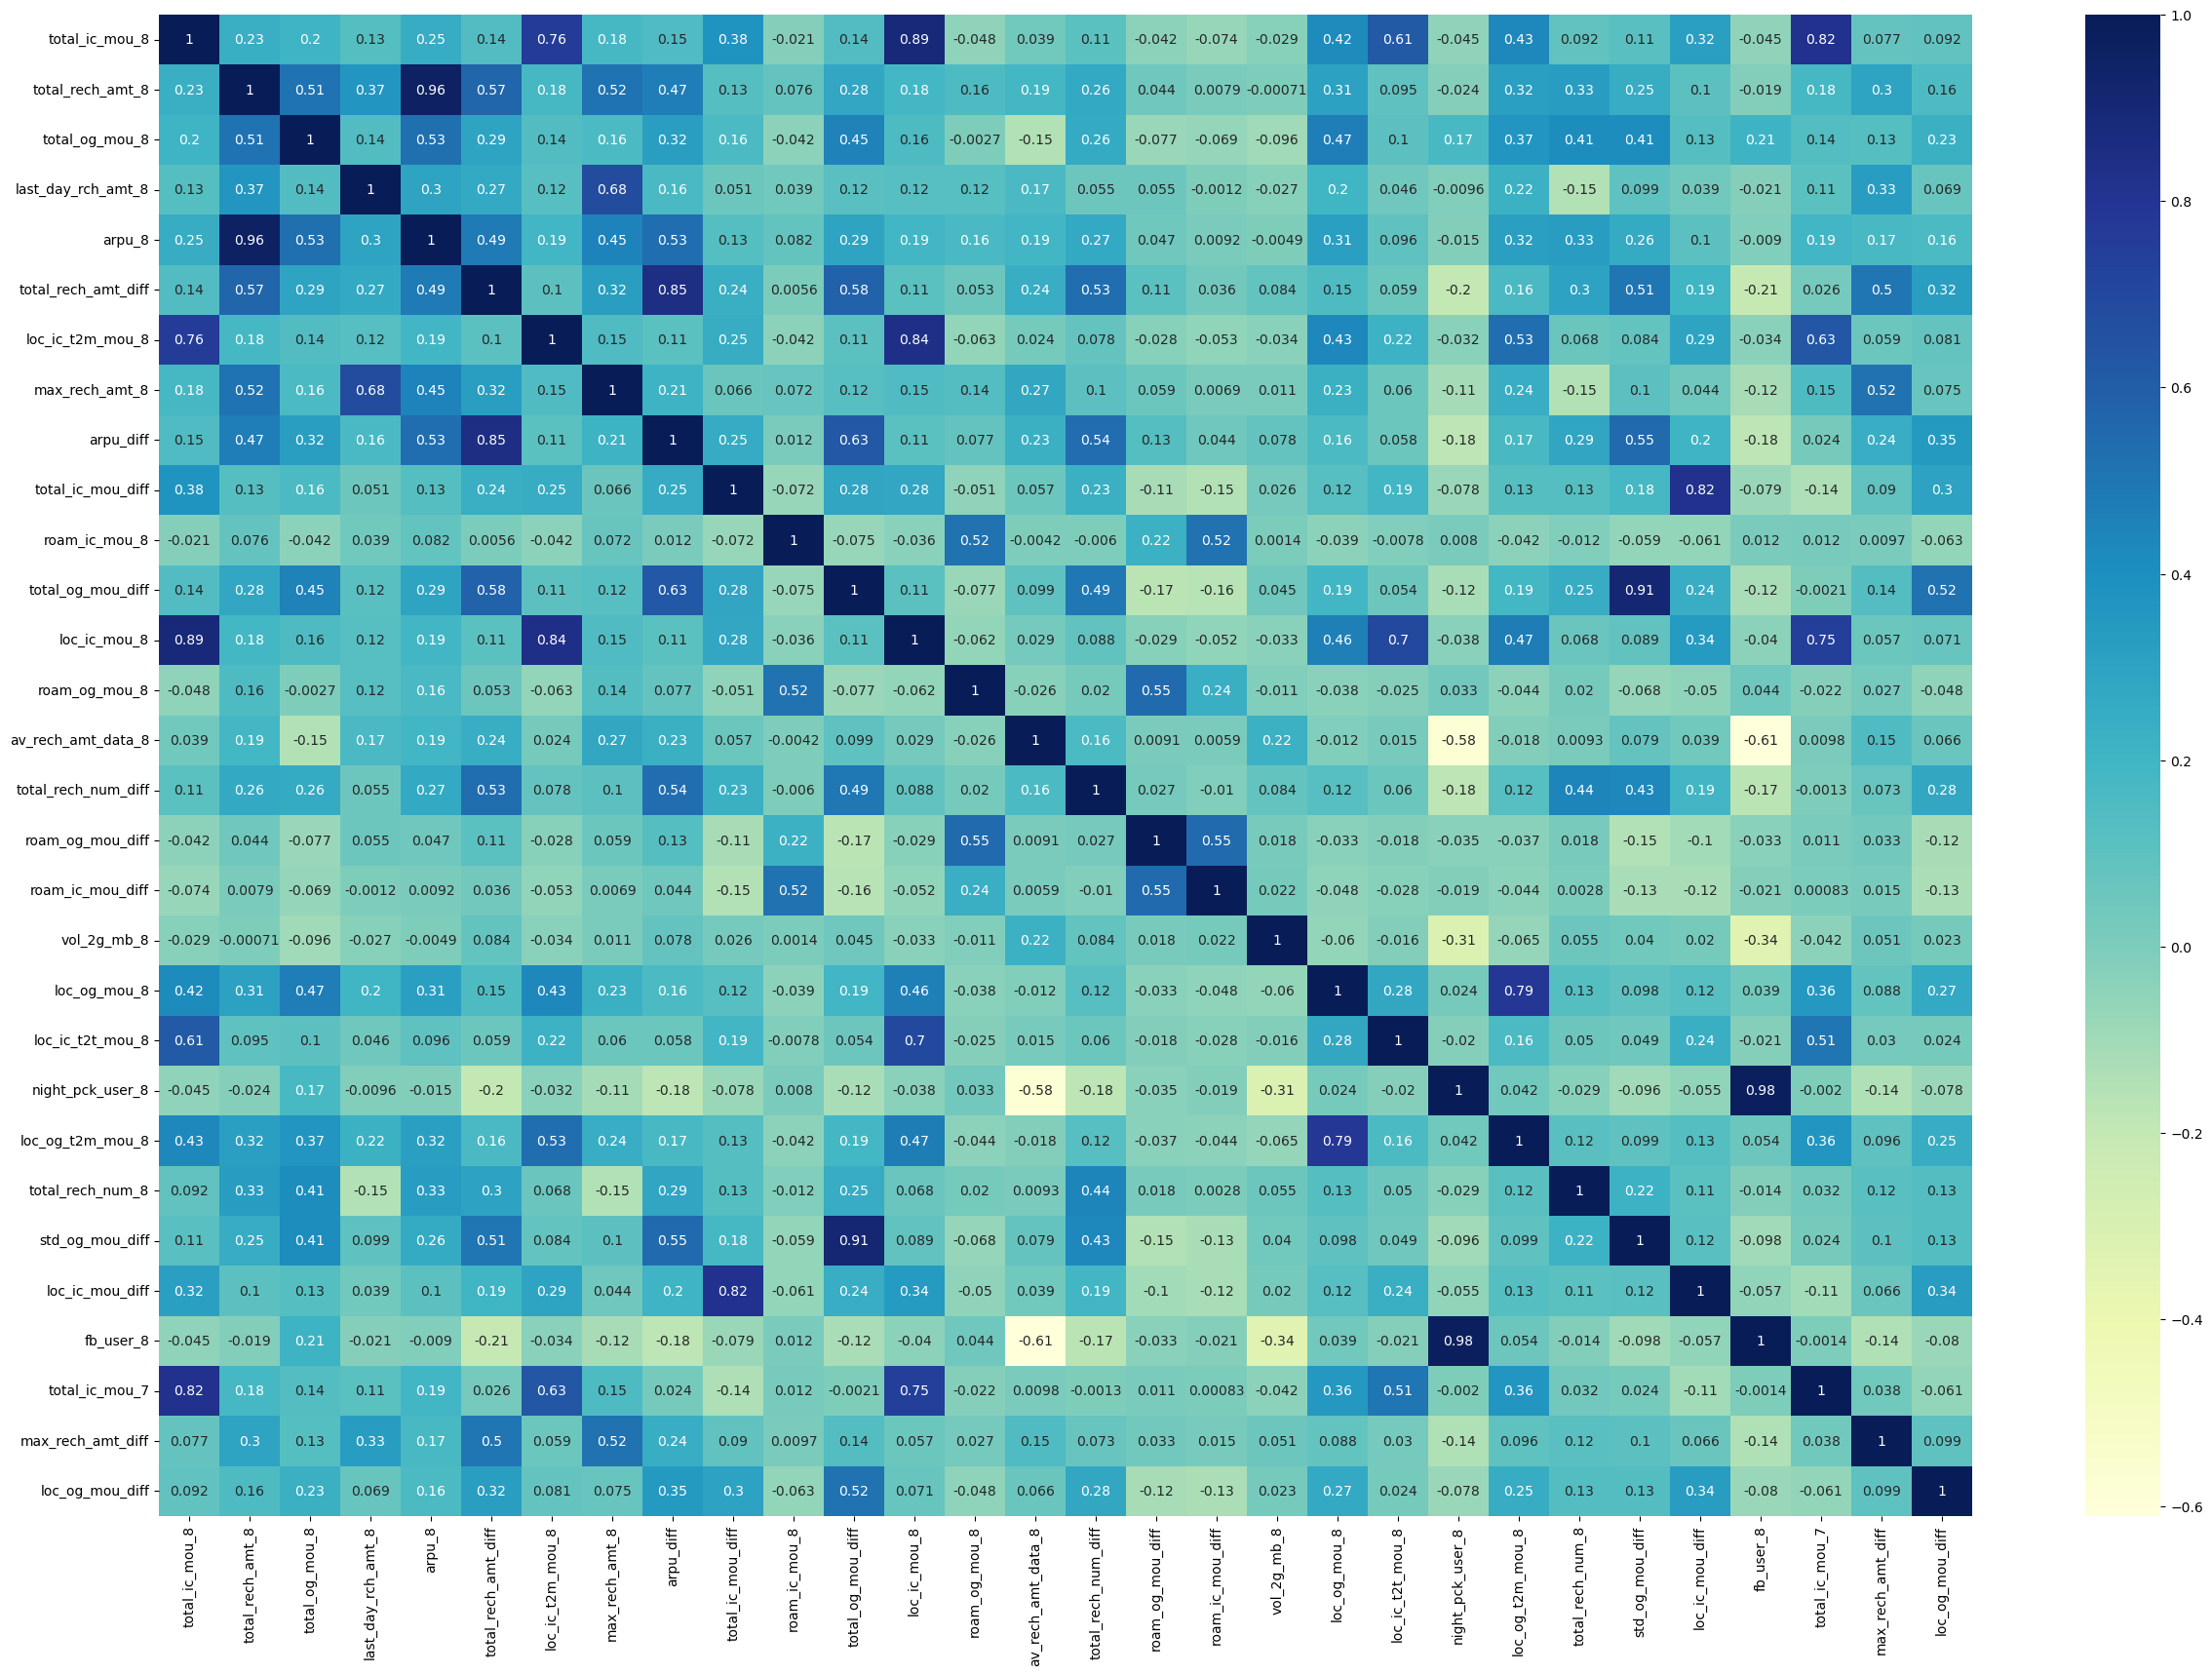

In [261]:
# View Features Co-relations

plt.figure(figsize = (30, 20))
sns.heatmap(data=X_train[top_30_features].corr(), annot = True, cmap="YlGnBu")
plt.show()

In [262]:


top_features = ['total_ic_mou_8', 'total_rech_amt_diff', 'total_og_mou_8', 'arpu_8', 'roam_ic_mou_8', 'roam_og_mou_8', 
                'std_ic_mou_8', 'av_rech_amt_data_8', 'std_og_mou_8']
X_train = X_train[top_features]
X_test = X_test[top_features]



In [263]:


# logistic regression
steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))
        ]

# compile pipeline
logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)



In [264]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [265]:
# print best hyperparameters

print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.879914789875548
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2'}


In [266]:


# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))



[[4011  808]
 [  95  340]]
Sensitivity: 	0.78
Specificity: 	0.83
ROC:    	 0.87


In [267]:
y_pred_prob

array([0.83873899, 0.25936278, 0.84876794, ..., 0.06126727, 0.1864181 ,
       0.33122426])

### 3.8. Extract the intercept and the coefficients from the logistic model¶


In [268]:

logistic_model = model.best_estimator_.named_steps['logistic']
# intercept
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])
# coefficients
coefficients = logistic_model.coef_.reshape((9, 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(X_train.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_features)
# concatenate dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients



,intercept,total_ic_mou_8,total_rech_amt_diff,total_og_mou_8,arpu_8,roam_ic_mou_8,roam_og_mou_8,std_ic_mou_8,av_rech_amt_data_8,std_og_mou_8
0,-1.646935,-1.839866,-0.830255,-1.330837,0.07176,0.025578,0.210955,0.488216,-0.730849,0.99888



## 4. Analysis 

-  STD Out going and STD In Coming are the Foucus area which are affecting customer , need to verify and offer requried
- Roming fearures also causing an impact , needs to verify and offer requried

## 5. Run the model on Test Data

In [269]:
# Load the new CSV file containing the test data
test_df = pd.read_csv('test.csv')

test_df.head()
test_df.shape

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

(30000, 171)

In [270]:

test_df[zero_impute] = test_df[zero_impute].apply(lambda x: x.fillna(0))

In [271]:
print(test_df[zero_impute].isnull().sum()*100/test_df.shape[1])


total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
dtype: float64


In [272]:
## Drop Date columuns form Df
df_test_new = test_df.drop(date_columns, axis=1)
df_test_new.shape

(30000, 162)

In [273]:
df_test_new = df_test_new.drop(['id','circle_id'], axis=1)
df_test_new.shape

(30000, 160)

In [274]:
# Replace NaN values in the categorical values with '-1' as a new Category

df_test_new[cat_columns] = df_test_new[cat_columns].apply(lambda x: x.fillna(-1))
print(df_test_new[cat_columns].isnull().sum()*100/df_test_new.shape[0])

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
dtype: float64


In [275]:
total_columns = df_test_new.shape[1]
include_columns = list(df_test_new.apply(lambda column: True if column.isnull().sum()/df_test_new.shape[0] < 0.7 else False))

drop_missing = pd.DataFrame({'features':df_test_new.columns , 'include': include_columns})
drop_missing.loc[drop_missing.include == True,:]

df_test_final = df_test_new.loc[:, include_columns]

df_test_final.shape

,features,include
0,loc_og_t2o_mou,True
1,std_og_t2o_mou,True
2,loc_ic_t2o_mou,True
3,arpu_6,True
4,arpu_7,True
5,arpu_8,True
6,onnet_mou_6,True
7,onnet_mou_7,True
8,onnet_mou_8,True
9,offnet_mou_6,True


(30000, 148)

In [276]:
imputer = KNNImputer(n_neighbors=2)
df_test_with_imputation = imputer.fit_transform(df_test_final) 

In [277]:
df_test_imputed=pd.DataFrame(df_test_with_imputation,columns=df_test_final.columns)
df_test_imputed.shape

(30000, 148)

In [278]:
df_test_final=df_test_imputed.copy()

In [279]:
df_test_final['total_data_rech_6'] = df_test_final['total_rech_data_6'] * df_test_final['av_rech_amt_data_6']
df_test_final['total_data_rech_7'] = df_test_final['total_rech_data_7'] * df_test_final['av_rech_amt_data_7']


# calculate total recharge amount month 6 and 7th  including Recharge amount and Data Recharge 
df_test_final['amt_data_6'] = df_test_final['total_rech_amt_6'] + df_test_final['total_data_rech_6']
df_test_final['amt_data_7'] = df_test_final['total_rech_amt_7'] + df_test_final['total_data_rech_7']

# calculate Average recharge amount month 6 and 7th
df_test_final['av_amt_data_6_7'] = (df_test_final['amt_data_6'] + df_test_final['amt_data_7'])/2

In [280]:
df_test_final['av_amt_data_6_7'].head()

0     96.5
1    500.0
2    750.0
3    185.0
4    423.0
Name: av_amt_data_6_7, dtype: float64

In [281]:
# delete variables created to filter high-value customers
df_test_final = df_test_final.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
df_test_final.shape

(30000, 148)

In [282]:
df_test_final['arpu_diff'] = df_test_final.arpu_8 - ((df_test_final.arpu_6 + df_test_final.arpu_7)/2)

df_test_final['onnet_mou_diff'] = df_test_final.onnet_mou_8 - ((df_test_final.onnet_mou_6 + df_test_final.onnet_mou_7)/2)

df_test_final['offnet_mou_diff'] = df_test_final.offnet_mou_8 - ((df_test_final.offnet_mou_6 + df_test_final.offnet_mou_7)/2)

df_test_final['roam_ic_mou_diff'] = df_test_final.roam_ic_mou_8 - ((df_test_final.roam_ic_mou_6 + df_test_final.roam_ic_mou_7)/2)

df_test_final['roam_og_mou_diff'] = df_test_final.roam_og_mou_8 - ((df_test_final.roam_og_mou_6 + df_test_final.roam_og_mou_7)/2)

df_test_final['loc_og_mou_diff'] = df_test_final.loc_og_mou_8 - ((df_test_final.loc_og_mou_6 + df_test_final.loc_og_mou_7)/2)

df_test_final['std_og_mou_diff'] = df_test_final.std_og_mou_8 - ((df_test_final.std_og_mou_6 + df_test_final.std_og_mou_7)/2)

df_test_final['isd_og_mou_diff'] = df_test_final.isd_og_mou_8 - ((df_test_final.isd_og_mou_6 + df_test_final.isd_og_mou_7)/2)

df_test_final['spl_og_mou_diff'] = df_test_final.spl_og_mou_8 - ((df_test_final.spl_og_mou_6 + df_test_final.spl_og_mou_7)/2)

df_test_final['total_og_mou_diff'] = df_test_final.total_og_mou_8 - ((df_test_final.total_og_mou_6 + df_test_final.total_og_mou_7)/2)

df_test_final['loc_ic_mou_diff'] = df_test_final.loc_ic_mou_8 - ((df_test_final.loc_ic_mou_6 + df_test_final.loc_ic_mou_7)/2)

df_test_final['std_ic_mou_diff'] = df_test_final.std_ic_mou_8 - ((df_test_final.std_ic_mou_6 + df_test_final.std_ic_mou_7)/2)

df_test_final['isd_ic_mou_diff'] = df_test_final.isd_ic_mou_8 - ((df_test_final.isd_ic_mou_6 + df_test_final.isd_ic_mou_7)/2)

df_test_final['spl_ic_mou_diff'] = df_test_final.spl_ic_mou_8 - ((df_test_final.spl_ic_mou_6 + df_test_final.spl_ic_mou_7)/2)

df_test_final['total_ic_mou_diff'] = df_test_final.total_ic_mou_8 - ((df_test_final.total_ic_mou_6 + df_test_final.total_ic_mou_7)/2)

df_test_final['total_rech_num_diff'] = df_test_final.total_rech_num_8 - ((df_test_final.total_rech_num_6 + df_test_final.total_rech_num_7)/2)

df_test_final['total_rech_amt_diff'] = df_test_final.total_rech_amt_8 - ((df_test_final.total_rech_amt_6 + df_test_final.total_rech_amt_7)/2)

df_test_final['max_rech_amt_diff'] = df_test_final.max_rech_amt_8 - ((df_test_final.max_rech_amt_6 + df_test_final.max_rech_amt_7)/2)

df_test_final['total_rech_data_diff'] = df_test_final.total_rech_data_8 - ((df_test_final.total_rech_data_6 + df_test_final.total_rech_data_7)/2)

df_test_final['max_rech_data_diff'] = df_test_final.max_rech_data_8 - ((df_test_final.max_rech_data_6 + df_test_final.max_rech_data_7)/2)

df_test_final['av_rech_amt_data_diff'] = df_test_final.av_rech_amt_data_8 - ((df_test_final.av_rech_amt_data_6 + df_test_final.av_rech_amt_data_7)/2)

df_test_final['vol_2g_mb_diff'] = df_test_final.vol_2g_mb_8 - ((df_test_final.vol_2g_mb_6 + df_test_final.vol_2g_mb_7)/2)

df_test_final['vol_3g_mb_diff'] = df_test_final.vol_3g_mb_8 - ((df_test_final.vol_3g_mb_6 + df_test_final.vol_3g_mb_7)/2)

In [287]:

top_features = ['total_ic_mou_8', 'total_rech_amt_diff', 'total_og_mou_8', 'arpu_8', 'roam_ic_mou_8', 'roam_og_mou_8', 
                'std_ic_mou_8', 'av_rech_amt_data_8', 'std_og_mou_8']
X_test = df_test_final[top_features]


In [290]:
X_test.head()
X_test.shape

,total_ic_mou_8,total_rech_amt_diff,total_og_mou_8,arpu_8,roam_ic_mou_8,roam_og_mou_8,std_ic_mou_8,av_rech_amt_data_8,std_og_mou_8
0,36.26,-36.5,57.94,64.445,0.00,0.00,4.34,0.0,28.48
1,281.66,0.0,415.59,360.868,0.00,0.00,0.00,0.0,17.68
2,0.00,250.0,0.00,746.239,26.08,54.44,0.00,0.0,0.00
3,549.13,-185.0,24.01,24.400,0.00,0.00,8.83,0.0,0.00
4,159.26,123.0,779.78,413.329,0.00,0.00,141.48,0.0,749.29


(30000, 9)

In [291]:

# predict churn on test data
y_pred = model.predict(X_test)


# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]


In [292]:
y_pred_prob

array([0.55311651, 0.13830401, 0.52576767, ..., 0.48772775, 0.85116872,
       0.22326633])

In [293]:
final_df = pd.DataFrame()
final_df['id'] = test_df['id']
final_df['churn_probability'] = np.where(y_pred_prob > 0.5 , 1, 0)
final_df.head()

,id,churn_probability
0,69999,1
1,70000,0
2,70001,1
3,70002,0
4,70003,0


In [295]:
final_df.to_csv('test_churn.csv',index=False)